In [9]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar los datos
data = pd.read_csv(filepath_or_buffer = "/Users/david/samsung.csv")

In [4]:
# Preprocesar los datos
# Convertir las fechas en un formato numérico si es necesario (por simplicidad se ignoran aquí)
X = data[['Close', 'Volume']].values  # Seleccionamos las características numéricas

In [5]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\david\uteq\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\david\uteq\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


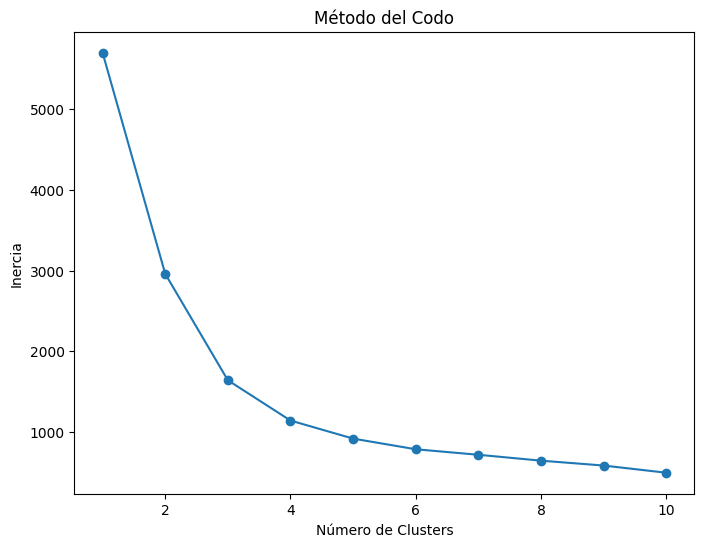

In [6]:
# Determinar el número óptimo de clusters usando el método del codo
inertia = []
for k in range(1, 11):  # Probamos con k de 1 a 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()


In [7]:
# Elegir el número óptimo de clusters (suponiendo que se elige 3 basándonos en el codo)
optimal_k = 3

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

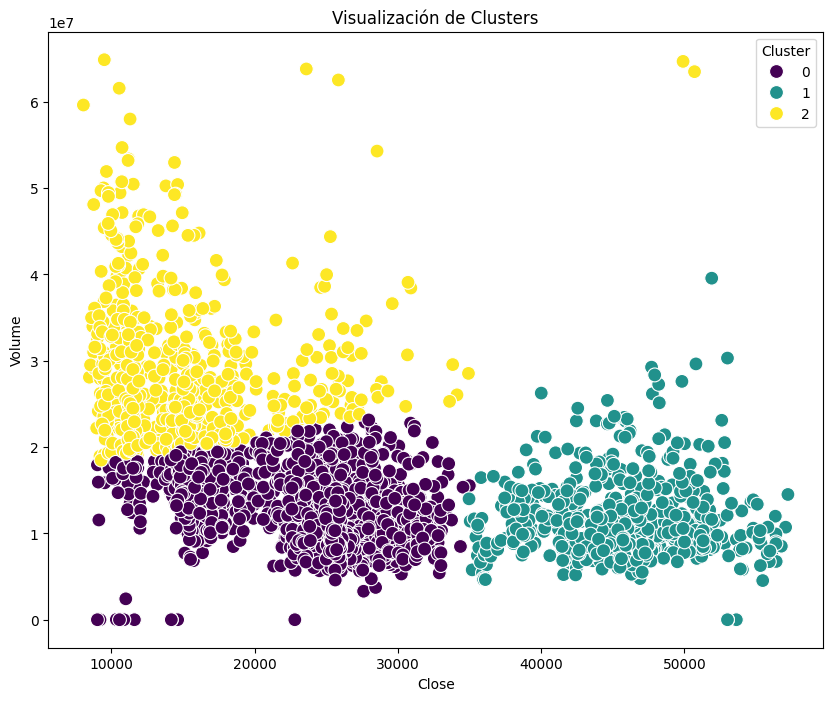

In [8]:
# Añadir los clusters al dataframe original
data['Cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Close'], y=data['Volume'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Visualización de Clusters')
plt.xlabel('Close')
plt.ylabel('Volume')
plt.legend(title='Cluster')
plt.show()